# Assignment: Центральная предельная теорема своими руками

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=true).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n? Review criteriaменьше Решение должно представлять собой IPython-ноутбук, содержащий:

* код, генерирующий выборки и графики;
* краткие описания каждого блока кода, объясняющие, что он делает;
* необходимые графики (убедитесь, что на них подписаны оси);
* выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;
* выводы по результатам выполнения задания.

In [1]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

%matplotlib inline

## Экспоненциальное распределение

Выбрано экспоненциальное распределение случайной величины. 
https://ru.wikipedia.org/wiki/%D0%AD%D0%BA%D1%81%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5

Плотность вероятности для экспоненциального распределения:

$
f_X(x) = \begin{cases}
\lambda \,e^{-\lambda x} ,& x \ge 0, \\
0 ,& x < 0.
\end{cases}.
$

Математическое ожидание:

$    
\begin{align}
    EX = {\lambda^{-1}}
\end{align}
$

Дисперсия:

$    
\begin{align}
    DX = {\lambda^{-2}}
\end{align}
$

## Гистограмма выборки и теоретическая плотность распределения

Генерация выборки объёма 1000.
Будем рассмотривать экспоненциальное распределение случайно величины с $\lambda = 2$. 

 и сравним гистограмму выборки и с теоретической плотностью распределения случайной величины.

In [2]:
lmbd = 2
n = 1000 
rv = sts.expon(scale=1/lmbd)
sample = rv.rvs(size=n)

Text(0.5, 0, '$x$')

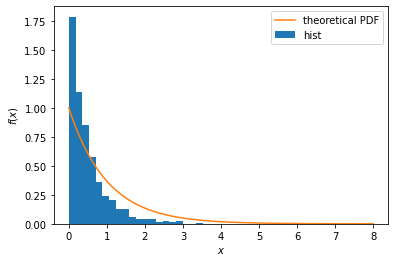

In [3]:
plt.hist(sample, bins = 20, density=True, label='hist') #гистограмма распределения

x = np.linspace(0,8,100)
pdf = sts.expon.pdf(x) #теоретическая плотность распределения
plt.plot(x, pdf, label='theoretical PDF')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

**Вывод:** гистограмма выборки не вполне совпадает с теоретической оценкой плотности вероятности распределения.

## Распределение выборочных средних
Оценка распределения выборочных средних случайной величины. 

Согласно Центральной Предельной Теореме выборочные средние  $\bar{X}_n = \frac{1}{n} \sum\limits_{i=1}^n X_i$ будут приближаться нормальным распределением $N(\mu = \mathbb{E}X, \sigma^2 = \frac{\mathbb{D}X}{n})$, где $n$ - объем выборки, $\mathbb{E}X$ и $\mathbb{D}X$ соответственно математическое ожидание и дисперсия рассматриваемого исходного распределения.

В нашем случае экспоненциального распределения: $\mathbb{E}X = \lambda^{-1}\, = 0.5$ - _математическое ожидание_, $\mathbb{D}X = \lambda^{-2}\, = 0.25$ - _дисперсия_.

Таким образом, __распределение выборочных средних экспоненциального распределения__ с $\lambda = 2$ будет приближаться нормальным распределением $N(\mu = 0.5, \sigma^2 = \frac{1}{4n})$.

In [4]:
def pdf_generator(n): 
    means = []
    for i in range(1000):
        sample = rv.rvs(n)
        sample_mean = np.mean(sample)
        means.append(sample_mean)

    mu = 0.5 
    sigma = (0.25/n) ** 0.5 
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0, 8, 100)
    pdf = norm_rv.pdf(x)
    
    plt.plot(x, pdf, linewidth = 2.5, label='theoretical PDF')
    plt.hist(means, density = True, label='hist')
    plt.legend()
    plt.xlabel('$\\bar{X}_n$')
    plt.ylabel('$f(\\bar{X}_n)$')
    plt.title('n = %d' % n)
    plt.show()
    
    return

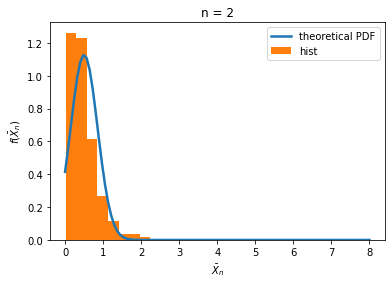

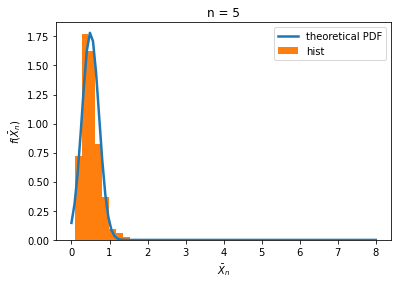

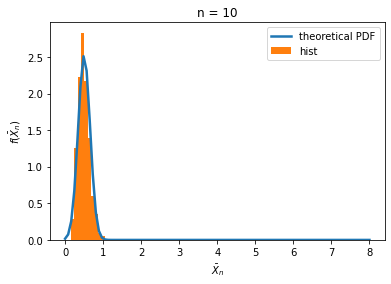

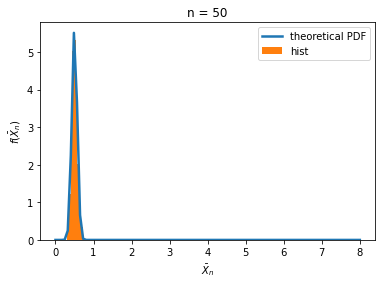

In [5]:
for n in [2, 5, 10, 50]:
    pdf_generator(n)

**Выводы:** чем больше объем выборки n, тем лучше распределение выборочных средних соответствует приближающему его нормальному распределению. При n=2 и 5 распределение несимметрично и не похожи на нормальные, но при бОльших n распределения всё больше приближаются к нормальному.